# Estimate the Svensson residuals on a daily basis

In [1]:
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Estimate liquidity factor using the Svensson curve

Load the Svensson curve coefficients

In [2]:
df = pd.read_stata('/Users/dioscuroi/OneDrive - UNSW/Research Data/Bonds/Bond Yields from FRB/Gurkaynak, Sack, Wright. 2006. The U.S. Treasury Yield Curve 1961 to the Present/svensson_coefs.dta')

df.index = pd.PeriodIndex(df['date'], freq='D')

del df['date']

Compute zero-coupon yield curve for 3-month maturity

In [3]:
n = 3/12

df['term1'] = (1 - np.exp(-n/df['tau1'])) / (n/df['tau1'])
df['term2'] = df['term1'] - np.exp(-n/df['tau1'])
df['term3'] = (1 - np.exp(-n/df['tau2'])) / (n/df['tau2']) - np.exp(-n/df['tau2'])

df['sven_m3'] = df['beta0'] + df['beta1'] * df['term1'] + df['beta2'] * df['term2'] + df['beta3'] * df['term3']

del df['term1']
del df['term2']
del df['term3']
            
df.head(3)

,beta0,beta1,beta2,beta3,tau1,tau2,sven_m3
date,,,,,,,
1961-06-14,3.917606,-1.277955,-1.949397,0.0,0.339218,-999.98999,2.567023
1961-06-15,3.978498,-1.257404,-2.247617,0.0,0.325775,-999.98999,2.574756
1961-06-16,3.984350,-1.429538,-1.885024,0.0,0.348817,-999.98999,2.538720


1. Combine with 3-month yields from FRED
2. Create the liquidity factor as the deviation of 3m T-bill yields from the Svensson curve

In [4]:
df_m3 = pd.read_stata('/Users/dioscuroi/OneDrive - UNSW/Research Data/Bonds/Bond Yields from FRB/Treasury Bills/yield_tbills_daily.dta')

df_m3.index = pd.PeriodIndex(df_m3['date'], freq='D')

In [5]:
df = df.join(df_m3['m3'])

df['sven_resid'] = df['m3'] - df['sven_m3']

df.head()

,beta0,beta1,beta2,beta3,tau1,tau2,sven_m3,m3,sven_resid
date,,,,,,,,,
1961-06-14,3.917606,-1.277955,-1.949397,0.0,0.339218,-999.98999,2.567023,2.32,-0.247023
1961-06-15,3.978498,-1.257404,-2.247617,0.0,0.325775,-999.98999,2.574756,2.32,-0.254756
1961-06-16,3.984350,-1.429538,-1.885024,0.0,0.348817,-999.98999,2.538720,2.33,-0.208720
1961-06-19,4.004379,-0.723311,-3.310743,0.0,0.282087,-999.98999,2.693494,2.33,-0.363494
1961-06-20,3.985789,-0.900432,-2.844809,0.0,0.310316,-999.98999,2.685162,2.31,-0.375162


Save the residuals and draw its time series

In [6]:
df_sven_resid = pd.DataFrame(df['sven_resid'])

df_sven_resid.to_csv('Svensson residual daily.csv')

In [7]:
df_sven_resid.describe()

,sven_resid
count,14053.000000
mean,-0.267705
std,0.350841
min,-3.042339
25%,-0.363597
50%,-0.217582
75%,-0.118720
max,4.140865


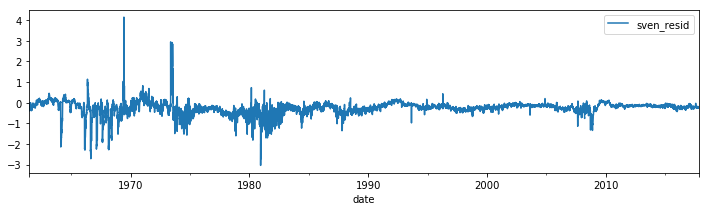

In [8]:
df_sven_resid.plot(figsize=(12,3))

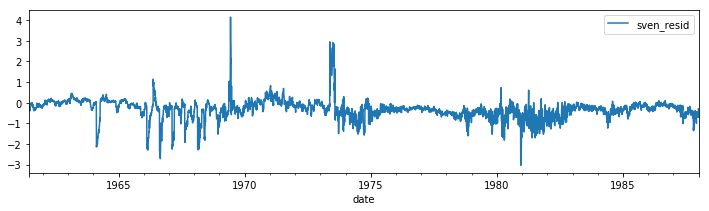

In [9]:
df_sven_resid[:'1987-12-31'].plot(figsize=(12,3))

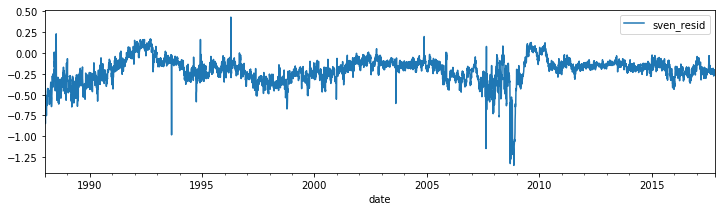

In [10]:
df_sven_resid['1988-01-01':].plot(figsize=(12,3))